In [1]:
%matplotlib inline
import d2lzh as d2l
import math
from mxnet import nd
import numpy as np

In [2]:
def gd(eta):
    x = 10
    results = [x]
    for i in range(10):
        x -= eta * 2 * x  # f(x) = x * x的导数为f'(x) = 2 * x
        results.append(x)
    print('epoch 10, x:', x)
    return results

res = gd(0.2)

epoch 10, x: 0.06046617599999997


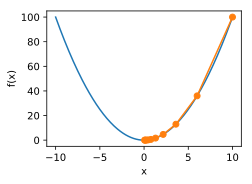

In [6]:

def show_trace(res):
    n = max(abs(min(res)), abs(max(res)), 10)
    f_line = np.arange(-n, n, 0.1)
    d2l.set_figsize()
    d2l.plt.plot(f_line, [x * x for x in f_line])
    d2l.plt.plot(res, [x * x for x in res], '-o')
    d2l.plt.xlabel('x')
    d2l.plt.ylabel('f(x)')

show_trace(res)

epoch 10, x: 3.4867844009999995


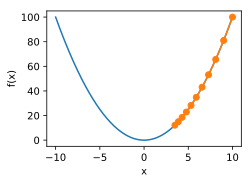

In [7]:
show_trace(gd(0.05))# 学习率低则下降慢

epoch 10, x: 61.917364224000096


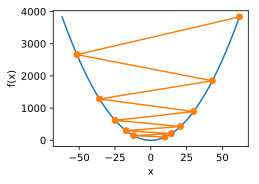

In [8]:
show_trace(gd(1.1))# 学习率过大会发散

In [35]:
def train_2d(trainer):  # 本函数将保存在d2lzh包中方便以后使用
    x1, x2, s1, s2 = -5, -2, 0, 0  # s1和s2是自变量状态，本章后续几节会使用
    results = [(x1, x2)]
    for i in range(20):
        x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print('epoch %d, x1 %f, x2 %f' % (i + 1, x1, x2))
    return results

def show_trace_2d(f, results):  # 本函数将保存在d2lzh包中方便以后使用
    print(results)
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1))
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')

epoch 20, x1 -0.000000, x2 -254964.724328
[(-5, -2), (2.0, 3.5999999999999996), (-0.7999999999999998, -6.479999999999999), (0.31999999999999984, 11.663999999999996), (-0.1279999999999999, -20.99519999999999), (0.05119999999999994, 37.791359999999976), (-0.02047999999999997, -68.02444799999995), (0.008191999999999987, 122.44400639999989), (-0.0032767999999999946, -220.3992115199998), (0.0013107199999999979, 396.7185807359996), (-0.0005242879999999991, -714.0934453247991), (0.0002097151999999996, 1285.368201584638), (-8.388607999999982e-05, -2313.662762852348), (3.3554431999999925e-05, 4164.592973134226), (-1.342177279999997e-05, -7496.267351641605), (5.368709119999987e-06, 13493.281232954889), (-2.1474836479999942e-06, -24287.906219318793), (8.589934591999974e-07, 43718.23119477383), (-3.435973836799988e-07, -78692.81615059287), (1.3743895347199948e-07, 141647.06907106715), (-5.497558138879979e-08, -254964.72432792082)]


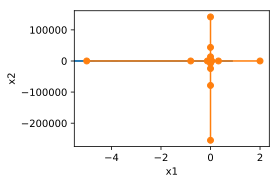

In [36]:
eta = 0.7 # 学习率

def f_2d(x1, x2):  # 目标函数
    return x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1, s2): # 梯度下降函数
    return (x1 - eta * 2 * x1, x2 - eta * 4 * x2, 0, 0)

show_trace_2d(f_2d, train_2d(gd_2d))

epoch 20, x1 -0.348316, x2 -253720.488599


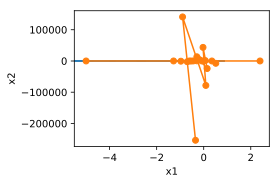

In [34]:
def sgd_2d(x1, x2, s1, s2):
    return (x1 - eta * (2 * x1 + np.random.normal(0.1)),
            x2 - eta * (4 * x2 + np.random.normal(0.1)), 0, 0)

show_trace_2d(f_2d, train_2d(sgd_2d))